In [1]:
# Read .edf files and save them in a 2D dictionary (subject,round)

import mne
import pyedflib
import numpy as np
import os

path = "../../Dataset/S002"                                  # Read specific subject dataset
file_name = os.path.join(path, 'S002R04.edf')             # Read specific round of the subject

round_data = mne.io.read_raw_edf(file_name)
round_data.load_data()
round_data.rename_channels(lambda s: s.strip("."))

print(round_data.info)

array_rnd_data = round_data.get_data()



Extracting EDF parameters from C:\Users\Alkinoos\Desktop\ML on mCs\Project\Dataset\S002\S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>


In [2]:
events = mne.read_annotations(file_name)

print(events)
print("\n")
print(events[0])
print("\n")
print(getattr(events,'onset'))
print("\n")
print(getattr(events,'duration'))
print("\n")
print(getattr(events,'description'))
print("\n")
print(getattr(events,'orig_time'))
print("\n")

<Annotations | 30 segments: T0 (15), T1 (7), T2 (8)>


OrderedDict([('onset', 0.0), ('duration', 4.1), ('description', 'T0'), ('orig_time', None)])


[  0.    4.1   8.2  12.3  16.4  20.5  24.6  28.7  32.8  36.9  41.   45.1
  49.2  53.3  57.4  61.5  65.6  69.7  73.8  77.9  82.   86.1  90.2  94.3
  98.4 102.5 106.6 110.7 114.8 118.9]


[4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1
 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1 4.1]


['T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T2'
 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1' 'T0' 'T2' 'T0' 'T1'
 'T0' 'T2']


None




4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


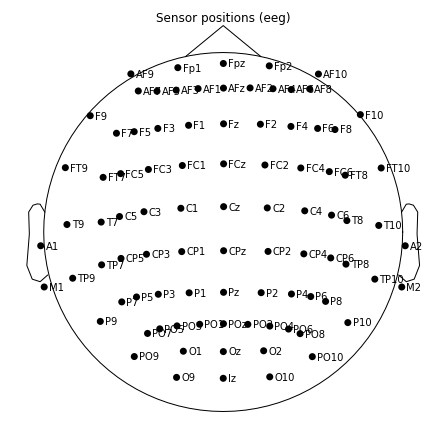

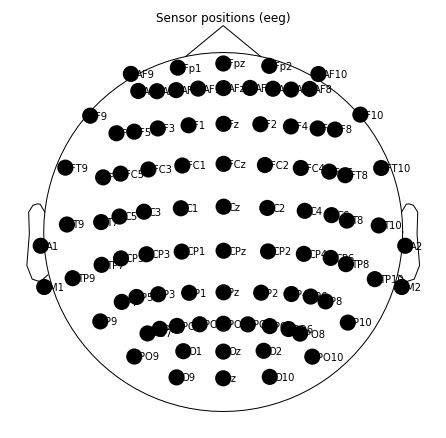

In [3]:
montage_kind = "standard_1020"
montage = mne.channels.make_standard_montage(montage_kind)

montage.plot(scale_factor=200)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


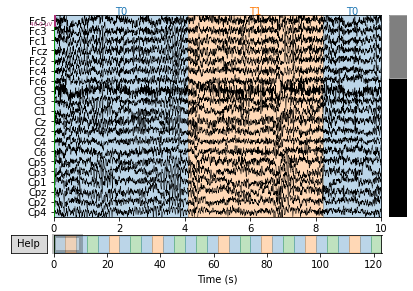

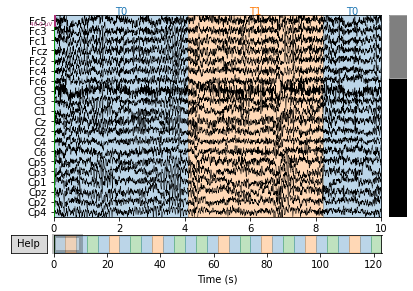

In [4]:
round_data.set_montage(montage, match_case=False)
round_data.set_eeg_reference("average")

round_data.plot()

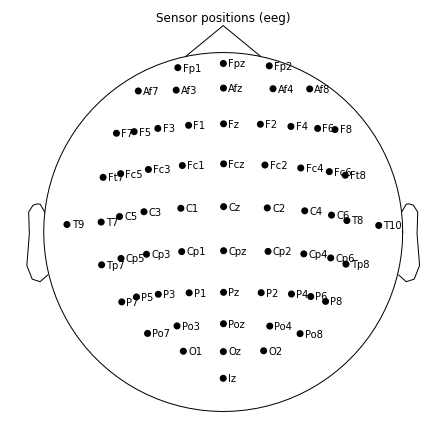

Figure(432x432)
<Info | 9 non-empty values
 bads: []
 ch_names: Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>


In [5]:
print(round_data.plot_sensors(show_names = True))
print(round_data.info)

In [6]:
montage_image = round_data.get_montage()
a = getattr(montage_image,'dig')
print(a)
print("\n")
print(a[3])
print("\n")
print(a[3].keys())
print("\n")
print(a[3].values())
print("\n")
print(a[3].get('r'))

b = a[3].get('r')
print(b[2])

[<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>, <DigPoint |     Nasion : (0.0, 102.7, 0.0) mm      : head frame>, <DigPoint |        RPA : (82.2, 0.0, 0.0) mm       : head frame>, <DigPoint |     EEG #1 : (-74.0, 42.1, 66.5) mm    : head frame>, <DigPoint |     EEG #2 : (-57.7, 48.3, 95.9) mm    : head frame>, <DigPoint |     EEG #3 : (-32.7, 53.2, 119.0) mm   : head frame>, <DigPoint |     EEG #4 : (0.3, 55.1, 127.2) mm     : head frame>, <DigPoint |     EEG #5 : (33.3, 53.5, 117.9) mm    : head frame>, <DigPoint |     EEG #6 : (59.7, 49.2, 95.9) mm     : head frame>, <DigPoint |     EEG #7 : (76.2, 43.4, 66.4) mm     : head frame>, <DigPoint |     EEG #8 : (-77.0, 11.5, 73.3) mm    : head frame>, <DigPoint |     EEG #9 : (-62.7, 16.1, 106.8) mm   : head frame>, <DigPoint |    EEG #10 : (-34.7, 19.5, 130.9) mm   : head frame>, <DigPoint |    EEG #11 : (0.4, 21.0, 140.9) mm     : head frame>, <DigPoint |    EEG #12 : (36.1, 19.7, 129.7) mm    : head frame>, <DigPoint

In [7]:
# Get coordinates of electrodes in a single array
elec_coord = np.zeros((67,2))

# Information about electrodes
elec_info = getattr(montage_image,'dig')

# Save x and y coordinates of LPA(index 0), nasion(index 1), RPA(index 2) and all electrodes (indeces 3-67) in the array
for i in range(0,67):
    xyz = elec_info[i].get('r')
    elec_coord[i] = [xyz[1],xyz[0]]

# Normalize coordinates
max_y = np.amax(elec_coord[:,0])
min_y = np.amin(elec_coord[:,0])

max_x = np.amax(elec_coord[:,1])
min_x = np.amin(elec_coord[:,1])

for i in range(0,67):
    
    # Normalize y coordinates 
    # Positive
    if (elec_coord[i][0] > 0):
        elec_coord[i][0] = abs(round(16*abs(elec_coord[i][0]/max_y))-16)
    # Negative
    else:
        elec_coord[i][0] = round(15*abs(elec_coord[i][0]/(min_y)))+16
    
    # Normanize x coordinates
    # Positive
    if (elec_coord[i][1] > 0):
        elec_coord[i][1] = round(15*abs(elec_coord[i][1]/max_x))+16
    # Negative
    else:
        elec_coord[i][1] = abs(round(16*abs(elec_coord[i][1]/min_x))-16)

print(elec_coord)


[[16.  0.]
 [ 1. 16.]
 [16. 31.]
 [10.  2.]
 [ 9.  5.]
 [ 8. 10.]
 [ 8. 16.]
 [ 8. 22.]
 [ 9. 27.]
 [ 9. 30.]
 [14.  1.]
 [14.  4.]
 [13.  9.]
 [13. 16.]
 [13. 23.]
 [13. 28.]
 [14. 31.]
 [19.  1.]
 [19.  4.]
 [19.  9.]
 [19. 16.]
 [19. 23.]
 [19. 28.]
 [19. 31.]
 [ 1. 11.]
 [ 0. 16.]
 [ 1. 21.]
 [ 3.  6.]
 [ 1. 10.]
 [ 1. 16.]
 [ 1. 22.]
 [ 3. 26.]
 [ 7.  3.]
 [ 6.  4.]
 [ 5.  7.]
 [ 4. 11.]
 [ 4. 16.]
 [ 4. 21.]
 [ 4. 25.]
 [ 5. 28.]
 [ 6. 29.]
 [11.  1.]
 [11. 30.]
 [15.  0.]
 [15. 31.]
 [15.  0.]
 [15. 31.]
 [20.  0.]
 [19. 31.]
 [24.  3.]
 [24.  3.]
 [24.  6.]
 [24. 11.]
 [24. 16.]
 [24. 22.]
 [24. 26.]
 [24. 28.]
 [24. 29.]
 [27.  6.]
 [28.  9.]
 [28. 16.]
 [28. 22.]
 [27. 26.]
 [30. 11.]
 [30. 16.]
 [30. 21.]
 [31. 16.]]


In [8]:
montage_image.save("montage.fif")

In [19]:
# Read .edf files and save them in a 2D dictionary (subject,round)

import mne
import pyedflib
import numpy as np
import os

path = "../../Dataset/S002"                                  # Read specific subject dataset
file_name = os.path.join(path, 'S002R06.edf')             # Read specific round of the subject

round_data = mne.io.read_raw_edf(file_name)
round_data.load_data()
round_data.rename_channels(lambda s: s.strip("."))
array_rnd_data = round_data.get_data()
print(array_rnd_data.shape)

# TO DO: Maybe add band-pass filtering here for Delta, Mu and Beta ranges

fft = mne.time_frequency.stft(array_rnd_data,64)
print(fft.shape)

# One task all windows all electrodes
# 10 2-D images
    
pixels = np.zeros((10,64,3))    # pixels(windows, electrodes, (R,G,B)) and each (R,G,B) corresponds to one electrode
max_value = np.zeros(3)

for window in range(0,10):    # Windows for a single task/imagined movement
    for i in range(0,64):

        # Extract value for Delta Band (0.5 - 4 Hz)
        # Calculate sum of squares of absolute values
        # all electrodes / freq_ranges 1,2,3 / window 1
        pixels[window][i][0] = abs(fft[i][0][2*window])**2 + abs(fft[i][1][2*window])**2 + abs(fft[i][2][2*window])**2

        # Extract value for Mu Band (8 - 13 Hz)
        # Calculate sum of squares of absolute values
        # electrode 1 / freq_ranges 4,5,6 / window 1 
        pixels[window][i][1] = abs(fft[i][3][2*window])**2 + abs(fft[i][4][2*window])**2 + abs(fft[i][5][2*window])**2

        # Extract value for Beta Band (13 - 30 Hz)
        # Calculate sum of squares of absolute values
        # electrode 1 / freq_ranges 7,8,9,10,11,12,13 / window 1 
        pixels[window][i][2] = abs(fft[i][6][2*window])**2 + abs(fft[i][7][2*window])**2 + abs(fft[i][8][2*window])**2 + abs(fft[i][9][2*window])**2 + abs(fft[i][10][2*window])**2 + abs(fft[i][11][2*window])**2 + abs(fft[i][12][2*window])**2

    


Extracting EDF parameters from C:\Users\Alkinoos\Desktop\ML on mCs\Project\Dataset\S002\S002R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
(64, 19680)
Number of frequencies: 33
Number of time steps: 615
(64, 33, 615)


In [20]:
for window in range(0,10):    # Windows for a single task/imagined movement
    
    # Normalize R,G,B channels to fit the (0,1) range with the max value of each band    
    #print(np.amax(pixels))
    max_value[0] = np.amax(pixels[window,:,0]) # max value of Delta band
    max_value[1] = np.amax(pixels[window,:,1]) # max value of Mu band
    max_value[2] = np.amax(pixels[window,:,2]) # max value of Beta band

    for j in range(0,64):
        for k in range(0,3):
            pixels[window][j][k] = pixels[window][j][k]/max_value[k]
            if (pixels[window][j][k] > 1):
                print(pixels[window][j][k])
            
     
    # Reshape the image into an 8x8 image
#    image = np.resize(pixels[window],(8,8,3))    # Single image for a single window for all electrodes
#    plt.figure()
#    plt.imshow(image)
    
# print(image[0][0])

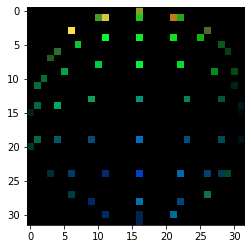

In [21]:
import matplotlib.pyplot as plt
# Construct an nparray with 32x32 pixels
image = np.zeros((32,32,3))

# Connect electrode coordinate (dim1,dim2) as found before with the appropriate (R,G,B) value of the suitable electrode
for i in range(3,67):
    y = int(elec_coord[i][0])
    x = int(elec_coord[i][1])
    image[y][x] = pixels[window][i-3]
    for k in range(0,3):
        if (image[y][x][k] > 1):
            print(image[y][x])
     
plt.imshow(image)

In [24]:
# Interpolation for one window all electrodes
from scipy.interpolate import griddata

electrodes = np.zeros((64,2))

for k in range(0,64):
    electrodes[k] = elec_coord[k+3]

image_x, image_y = np.mgrid[0:32, 0:32]
print(electrodes.shape)
print(pixels[window].shape)

interpolation = griddata(electrodes,pixels[0], (image_x, image_y), method ='cubic')

(64, 2)
(64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(32, 32, 3)


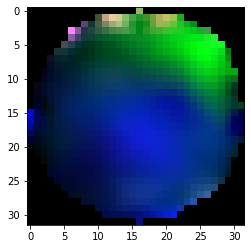

In [25]:
# Plot interpolated image
print(interpolation.shape)

plt.imshow(interpolation)

In [17]:
a = interpolation.flatten()
for i in range(3072):
    if(a[i]>1):
        print(i)

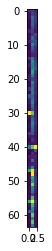

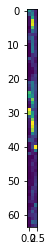

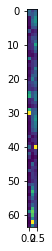

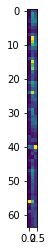

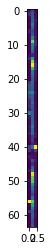

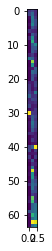

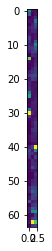

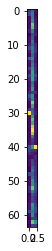

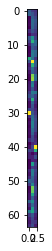

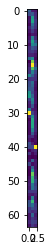

In [18]:
# Interpolation for all windows of one task all electrodes
interpolation = np.zeros((10,32,32,3))
for window in range(0,10):
    interpolation[window] = griddata(electrodes,pixels[window], (image_x, image_y), method ='linear')
    plt.figure()
    plt.imshow(pixels[window])

In [30]:
print(interpolation.shape)

(10, 32, 32, 3)


In [31]:
import h5py

#f = h5py.File("test_all1.h5","a")
#f.create_dataset('training', shape=(10,32,32,3))

#with h5py.File('./test_all1.h5','a') as hf:
#    a = hf["training"][2]
#    print(a)
#    print(a.shape)
for i in range(0,10):
    with h5py.File('./test_all1.h5','a') as hf:
        hf["training"][i] = interpolation[i]
        print(hf["training"][i,23,22])
        print(interpolation[i][23][22])
        

f.close()

KeyError: "Unable to open object (object 'training' doesn't exist)"

In [33]:
f = h5py.File("test_all1.h5","r")

data = f['training'][:]
f.close()

print(data.shape)
print(data[0].shape)

print(data[1][23][22])

KeyError: "Unable to open object (object 'training' doesn't exist)"

NameError: name 'data' is not defined

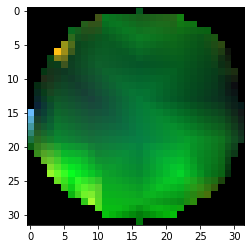

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure()
plt.imshow(interpolation[0])

plt.figure()
plt.imshow(data[0])

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

train_images = interpolation
train_labels = np.zeros((10,1))
print(train_labels)

test_images = interpolation[0:1]
test_labels = np.zeros((1,1))

class_names = ['Rest', 'MI Left Fist', 'MI Right Fist', 'MI Both Fists', 'MI Both Feet']

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [17]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(10, 32, 32, 3)
(10, 1)
(1, 32, 32, 3)
(1, 1)


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Epoch 1/3
1/1 [==============================] - 0s 109ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/3
1/1 [==============================] - 0s 0s/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 16ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000


1/1 - 0s - loss: nan - accuracy: 1.0000


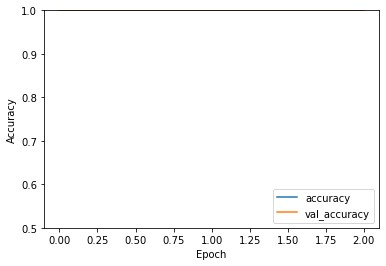

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [21]:
print(test_acc)

1.0
